In [3]:
# Import libraries that we'll need...
import pandas as pd
import numpy as np
from scipy import stats# As usual, plot the data...
from sklearn.utils import resample
import matplotlib
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.nonparametric.smoothers_lowess import lowess



# Import libraries that we'll need...

import matplotlib.pyplot as plt
from scipy import stats

# Activity of gene 136 on ALL (acute lymphoblastic leukemia) patients
col_names = df_leuk.columns
print('ALL Scores')
df_leuk[[col for col in col_names if 'ALL' in col]].iloc[135].plot.hist(figsize=(20,10), bins=11, ylim=(0,14))
print('mean: ' + str(df_leuk[[col for col in col_names if 'ALL' in col]].iloc[135].mean())) 

NameError: name 'df_leuk' is not defined

In [4]:
# Import data (I uploaded a copy to blackboard) and see what's in it
df_func_happy = pd.read_csv('Happiness.csv')
df_func_happy

df_LA = df_func_happy[df_func_happy['Region'] == 'Latin America and Caribbean']
df_others =df_func_happy[df_func_happy['Region'] != 'Latin America and Caribbean']

df_LA

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
13,Costa Rica,Latin America and Caribbean,7.087,1.06879,1.02152,0.76146,0.55225,0.10547,0.22553
14,Puerto Rico,Latin America and Caribbean,7.039,1.35943,1.08113,0.77758,0.46823,0.12275,0.22202
16,Brazil,Latin America and Caribbean,6.952,1.08754,1.03938,0.61415,0.40425,0.14166,0.15776
20,Mexico,Latin America and Caribbean,6.778,1.11508,0.71460,0.71143,0.37709,0.18355,0.11735
23,Chile,Latin America and Caribbean,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595
24,Panama,Latin America and Caribbean,6.701,1.18306,0.98912,0.70835,0.48927,0.08423,0.24180
25,Argentina,Latin America and Caribbean,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989
28,Uruguay,Latin America and Caribbean,6.545,1.18157,1.03143,0.72183,0.54388,0.21394,0.18056
30,Colombia,Latin America and Caribbean,6.481,1.03032,1.02169,0.59659,0.44735,0.05399,0.15626
38,Guatemala,Latin America and Caribbean,6.324,0.83454,0.87119,0.54039,0.50379,0.08701,0.28808


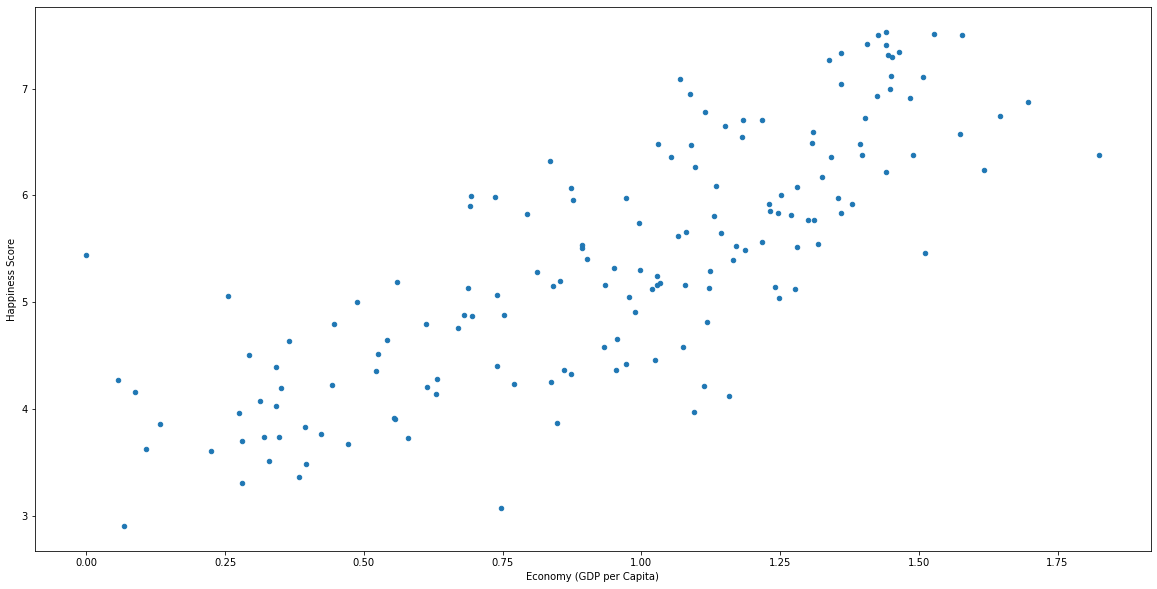

In [23]:
# As usual, plot the data...
properties = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust(Government Corruption)','Generosity']
df_func_happy.plot(x='Economy (GDP per Capita)', y='Happiness Score', kind='scatter', figsize=(20,10))

In [24]:
# Fit an Ordinary Least Squares (OLS) Regression estimator
ols_reg_model = OLS(df_func_happy['Happiness Score'], add_constant(df_func_happy['Economy (GDP per Capita)'])).fit()
ols_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     257.9
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           8.49e-35
Time:                        10:20:36   Log-Likelihood:                -166.16
No. Observations:                 157   AIC:                             336.3
Df Residuals:                     155   BIC:                             342.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.2962      0.141     23.302      0.000       3.017       3.576
Economy (GDP per Capita)     2.1869      0.136     16.059      0.000       1.918       2.456
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.094
Skew:                           0.035   Prob(JB):                        0.954
Kurtosis:                       2.903   Cond. No.                         4.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Fill a new dataframe column with the OLS predictions
df_func_happy['OLS_fit'] =  ols_reg_model.predict()

No handles with labels found to put in legend.


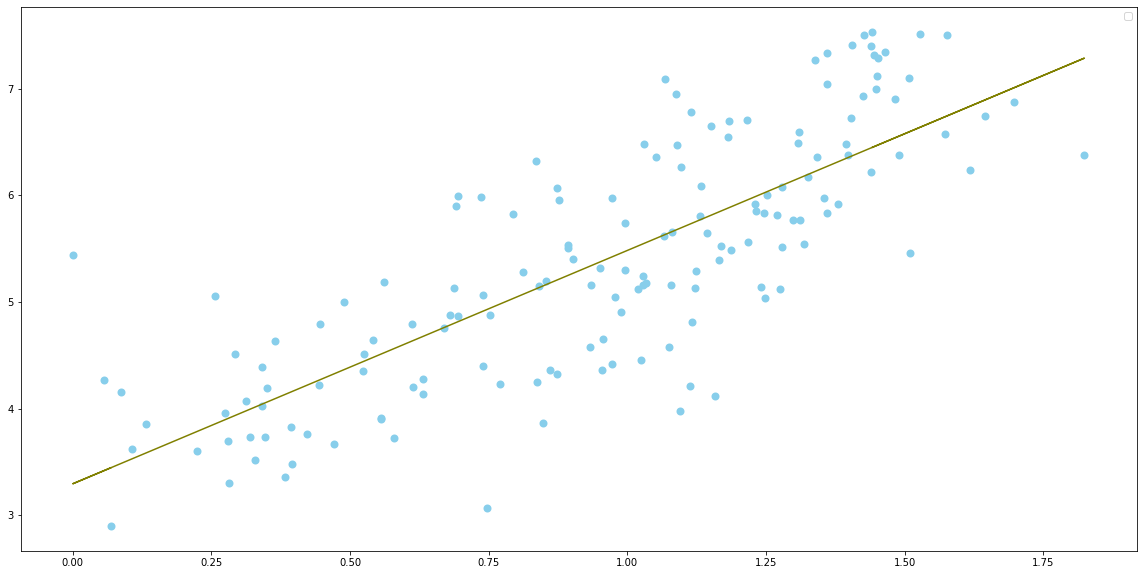

In [26]:
# Plot OLS predictions in same graph as linear model prediction
plt = matplotlib.pyplot
plt.figure(figsize=(20,10))
plt.scatter(df_func_happy['Economy (GDP per Capita)'], df_func_happy['Happiness Score'],
         marker='o', color='skyblue', linewidth=2)
plt.plot(df_func_happy['Economy (GDP per Capita)'], df_func_happy['OLS_fit'], color='olive')
plt.legend()
plt.show()

ALL Scores
mean: Happiness Score                  6.101750
Economy (GDP per Capita)         0.993410
Family                           0.898432
Health (Life Expectancy)         0.612703
Freedom                          0.426646
Trust (Government Corruption)    0.106016
Generosity                       0.208428
dtype: float64


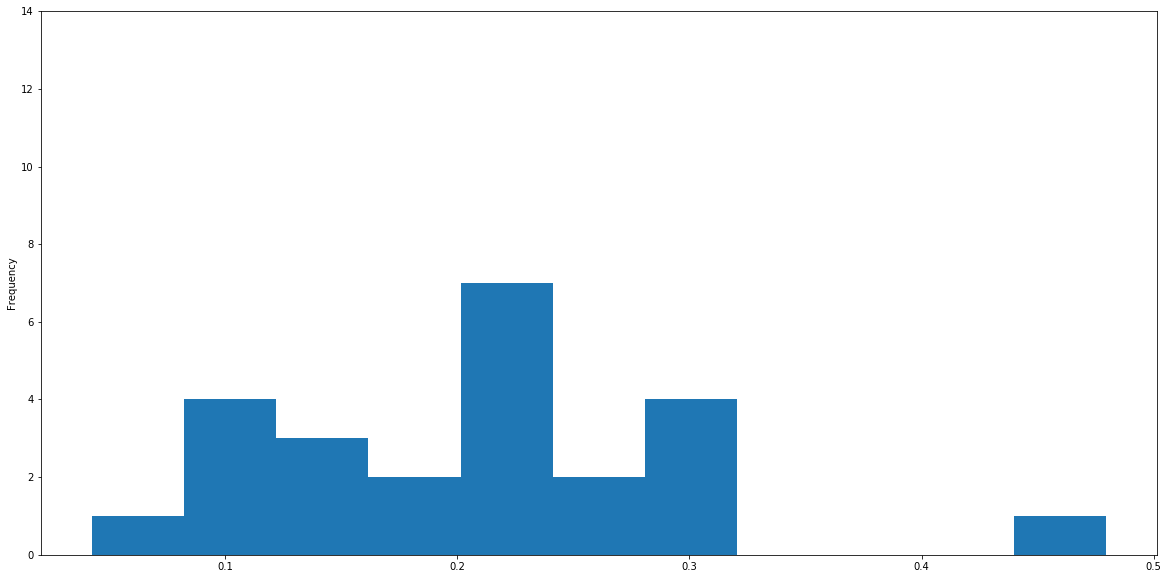

In [58]:
# Activity of gene 136 on ALL (acute lymphoblastic leukemia) patients
#col_names = df_leuk.columns
print('ALL Scores')
df_LA[properties[5]].plot.hist(figsize=(20,10), bins=11, ylim=(0,14))
print('mean: ' + str(df_LA.mean()) )

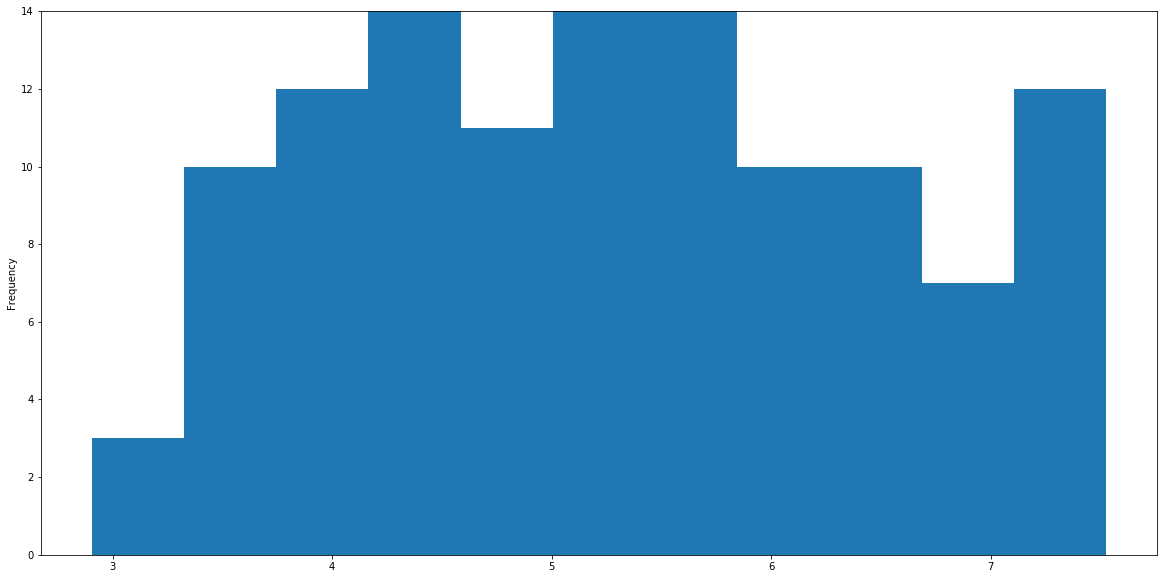

In [47]:
df_others['Happiness Score'].plot.hist(figsize=(20,10), bins=11, ylim=(0,14))

In [ ]:
print('Happiness Score')
print('mean LA: ' + str(df_LA['Happiness Score'].mean())) 
print('mean others: ' + str(df_others['Happiness Score'].mean())) 
stats.ttest_ind(df_LA[properties[0]], df_others['Happiness Score'])

In [28]:
properties = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']
# If assume same variances, then 
print(properties[0])
print('mean LA: ' + str(df_LA[properties[0]].mean())) 
print('mean others: ' + str(df_others[properties[0]].mean())) 
stats.ttest_ind(df_LA[properties[0]], df_others[properties[0]])


Economy (GDP per Capita)
mean LA: 0.9934099999999999
mean others: 0.9467465413533837


Ttest_indResult(statistic=0.5087448153114481, pvalue=0.6116544921231134)

In [29]:
print(properties[1])
print('mean LA: ' + str(df_LA[properties[1]].mean())) 
print('mean others: ' + str(df_others[properties[1]].mean())) 
stats.ttest_ind(df_LA[properties[1]], df_others[properties[1]])

Family
mean LA: 0.8984320833333334
mean others: 0.7747078195488726


Ttest_indResult(statistic=2.114876435925217, pvalue=0.036039852810399405)

In [30]:
print(properties[2])
print('mean LA: ' + str(df_LA[properties[2]].mean())) 
print('mean others: ' + str(df_others[properties[2]].mean())) 
stats.ttest_ind(df_LA[properties[2]], df_others[properties[2]])

Health (Life Expectancy)
mean LA: 0.6127025
mean others: 0.547679097744361


Ttest_indResult(statistic=1.280986084823989, pvalue=0.20211185167619442)

In [31]:
print(properties[3])
print('mean LA: ' + str(df_LA[properties[3]].mean())) 
print('mean others: ' + str(df_others[properties[3]].mean())) 
stats.ttest_ind(df_LA[properties[3]], df_others[properties[3]])

Freedom
mean LA: 0.42664625000000006
mean others: 0.36095135338345863


Ttest_indResult(statistic=2.0567451312718625, pvalue=0.04138709912210082)

In [32]:
print(properties[4])
print('mean LA: ' + str(df_LA[properties[4]].mean())) 
print('mean others: ' + str(df_others[properties[4]].mean())) 
stats.ttest_ind(df_LA[properties[4]], df_others[properties[4]])

Trust (Government Corruption)
mean LA: 0.10601624999999999
mean others: 0.14332736842105273


Ttest_indResult(statistic=-1.5214977368311584, pvalue=0.1301724125542952)

In [33]:
print(properties[5])
print('mean LA: ' + str(df_LA[properties[5]].mean())) 
print('mean others: ' + str(df_others[properties[5]].mean())) 
stats.ttest_ind(df_LA[properties[5]], df_others[properties[5]])

Generosity
mean LA: 0.20842833333333333
mean others: 0.24880751879699248


Ttest_indResult(statistic=-1.3649762016885076, pvalue=0.17423857126288836)

In [44]:
t_stats = list()
for i in range(0, 6):
    t_stats.append(stats.ttest_ind(df_LA[properties[i]], df_others[properties[i]])[0])
t_stats

[0.5087448153114481,
 2.114876435925217,
 1.280986084823989,
 2.0567451312718625,
 -1.5214977368311584,
 -1.3649762016885076]

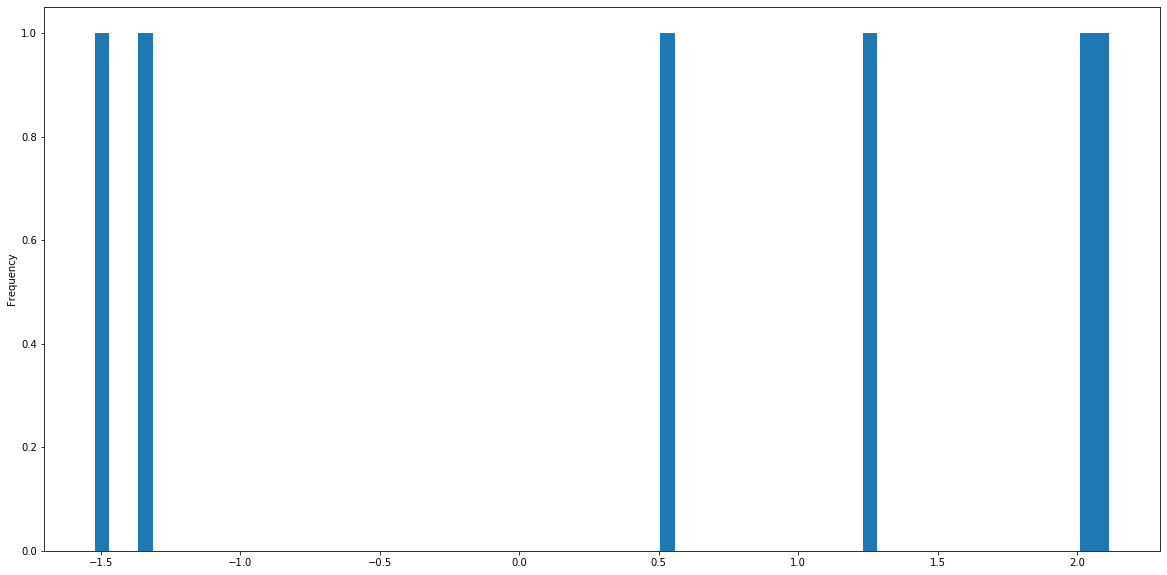

In [46]:
t_stats = pd.Series(t_stats)
t_stats.plot.hist(figsize=(20,10), bins=70)

In [66]:
np.random.shuffle(df_LA[properties[0]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyError: 7

In [113]:
l1 = len(df_LA)
contry = np.array(df_func_happy[properties[0]])
t_stats_random = list()
B=10000
for b in range(B):
    np.random.shuffle(contry)
    group_1 = contry[:l1]
    group_2 = contry[l1:]
    t_stats_random.append(stats.ttest_ind(group_1,group_2,equal_var=True)[0])

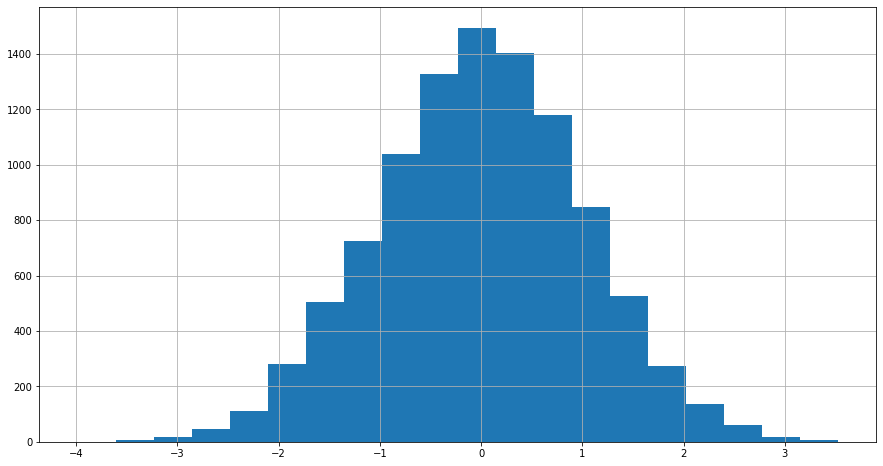

In [116]:
pd.Series(t_stats_random).hist(figsize=(15,8), bins=20)

In [117]:
np.quantile(t_stats,0.025),np.quantile(t_stats,1-0.025)

(-1.5019325449383272, 2.1076100228435477)

array([0.97306, 0.69384, 1.06879, 0.83454, 1.15137, 1.35943, 0.87616,
       1.18157, 0.34097, 0.99602, 1.2167 , 1.32572, 0.79422, 1.08754,
       1.02787, 0.8737 , 1.03032, 0.69429, 0.89333, 0.89373, 1.18306,
       1.09686, 1.11508, 1.13367])